In [1]:
pip install pyreadstat

     |████████████████████████████████| 1.9MB 4.8MB/s 


In [2]:
pip install geopandas

     |████████████████████████████████| 921kB 4.8MB/s 
     |████████████████████████████████| 11.8MB 39.7MB/s 
     |████████████████████████████████| 10.1MB 42.8MB/s 


In [0]:
import pandas as pd
from pathlib import Path
import os
from fastai import *
from fastai.tabular import *
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as ss
import geopandas as gpd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = Path(r'/content/drive/My Drive/Colab Notebooks/Italy_Unemployment/data')

In [6]:
os.listdir(data_path)

['Unemployment_2004-2019_tassi_provinciale_plus.csv',
 'Demographic_2004-2019_provinciale.csv',
 'Unemployment_with_ra.csv',
 'Ita_spatialdata',
 'Unemployment_2017_merged.csv',
 'Demographic_2001-2017_composition_provinciale.csv',
 'Unemployment_with_ra_demcomp.csv',
 'Demographic_2016-2017_education_regionale.csv',
 'Unemployment_with_ra_demcomp_educat.csv',
 'Survey_2018Oct.sav',
 'cities_model',
 'individual_model',
 'Survey_variable-description.csv',
 'Survey_2018Oct_f.csv',
 'Survey_2018Apr.sav',
 'Survey_2018Jul.sav',
 'Survey_f.csv',
 'Survey_2017Oct.sav',
 'Survey_2018Jan.sav',
 'Survey_2017Jul.sav',
 'json_file.json',
 'pipeline1.joblib']

In [0]:
df1, meta1 = pyreadstat.read_sav(os.path.join(data_path,'Survey_2018Oct.sav' ))
df2, meta2 = pyreadstat.read_sav(os.path.join(data_path,'Survey_2018Jul.sav' ))
df3, meta3 = pyreadstat.read_sav(os.path.join(data_path,'Survey_2018Apr.sav' ))
df4, meta3 = pyreadstat.read_sav(os.path.join(data_path,'Survey_2018Jan.sav' ))
df5, meta3 = pyreadstat.read_sav(os.path.join(data_path,'Survey_2017Oct.sav' ))
df6, meta3 = pyreadstat.read_sav(os.path.join(data_path,'Survey_2017Jul.sav' ))
frames = [df1, df2, df3, df4, df5, df6]
df = pd.concat(frames, sort = False)

In [8]:
df.head()

,IDNO,TITL,VERSION,RELEASE,ANNO,TRIM,WAVQUA,RIP5,RIP3,REG,PROVCM,GRACOM,MFRFAM,MFRIND,NN2,RPN2,TFM,TN2,SG4,SG11,ETAM,CLETAD,CLETAQ,CLETAS,STACIM,AMATRI,RELPAR,SG13,NASSES,CITTAD,SG16,CITSES,SG18B,SG18D,SG18E,SG18F,SG18G,TISTUD,EDULEV,HATLEV,...,H17,H18,H19,EDUCST,COURAT,I1,I5,I6,DIPAUP,DIPINP,I7,I8,I9,I11_C,ATE2DP,CAT12P,CAT5P,CAT3P,I12,I13,DOVRIS,REGPRE,PROPRE,RAPSES,COEF,COEFMIG,C23A,C29,C59AA,C79,D5A,F15,F39,G2,G4_01,G4_02,G4_07,G4_09,G5,G6
0,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,110022.0,1.0,1.0,8.0,1.0,3.0,2.0,37.0,4.0,6.0,9.0,2.0,2015.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,800.0,...,NaN,NaN,NaN,2.0,2.0,1.0,1.0,5.0,3.0,2.0,NaN,1.0,NaN,7112.0,71.0,9.0,5.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,591.0,0.5910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,17022.0,1.0,2.0,8.0,1.0,3.0,1.0,36.0,4.0,6.0,9.0,2.0,2015.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,...,NaN,NaN,NaN,2.0,2.0,1.0,1.0,5.0,3.0,2.0,NaN,1.0,NaN,7112.0,71.0,9.0,5.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,591.0,0.5910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,14836.0,1.0,3.0,8.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,6.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.0,...,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,0.5910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,1.0,1.0,7.0,9.0,NaN,7.0,2314.0,0.0,0.0,1.0,0.0,1.0,2.0,68.0,7.0,12.0,15.0,6.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,...,NaN,NaN,NaN,2.0,1.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,235.6,0.2356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,2.0,1.0,1.0,7.0,210.0,10025.0,9.0,35513.0,0.0,0.0,1.0,0.0,1.0,1.0,60.0,6.0,11.0,14.0,3.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,...,NaN,NaN,NaN,2.0,2.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,714.5,0.7145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(560961, 366)

In [0]:
col_list = list(df.columns)

In [11]:
col_list.index('COND3')

51

In [0]:
#drop all columns after COND3. 
col_drop = col_list[53:]
df.drop(columns= col_drop, inplace=True)
df.drop(columns=['MFRFAM', 'MFRIND'], inplace=True)

In [13]:
df.shape

(560961, 51)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560961 entries, 0 to 94178
Data columns (total 51 columns):
IDNO        560961 non-null object
TITL        560961 non-null object
VERSION     560961 non-null object
RELEASE     560961 non-null object
ANNO        560961 non-null float64
TRIM        560961 non-null float64
WAVQUA      560961 non-null float64
RIP5        560961 non-null float64
RIP3        560961 non-null float64
REG         560961 non-null float64
PROVCM      560961 non-null float64
GRACOM      59694 non-null float64
NN2         560961 non-null float64
RPN2        560961 non-null float64
TFM         560961 non-null float64
TN2         560961 non-null float64
SG4         560961 non-null float64
SG11        560961 non-null float64
ETAM        560961 non-null float64
CLETAD      560961 non-null float64
CLETAQ      560961 non-null float64
CLETAS      560961 non-null float64
STACIM      560961 non-null float64
AMATRI      263078 non-null float64
RELPAR      560961 non-null flo

In [0]:
#transform dep_var COND3 'int' type to avoid later errors with Float
df = df.assign(COND3=df.COND3.astype('int'))

In [16]:
#not really useful as most of the categories are categorical
df.describe()

,ANNO,TRIM,WAVQUA,RIP5,RIP3,REG,PROVCM,GRACOM,NN2,RPN2,TFM,TN2,SG4,SG11,ETAM,CLETAD,CLETAQ,CLETAS,STACIM,AMATRI,RELPAR,SG13,NASSES,CITTAD,SG16,CITSES,SG18B,SG18D,SG18E,SG18F,SG18G,TISTUD,EDULEV,HATLEV,SG24A,SG24B,SG25,SG25_4,SG25_5,SG25_6,SG25_6PD,SG25_7,SG26,SG27A,SG27,COND3,COND10
count,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,59694.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,560961.000000,263078.000000,560961.000000,560961.000000,49743.000000,560961.000000,560961.000000,40551.000000,49743.000000,48930.000000,49743.000000,858.000000,836.000000,494352.000000,494352.00000,560961.000000,1369.000000,61753.000000,229089.000000,28295.000000,138089.000000,1340.000000,29.000000,61336.000000,473117.000000,95274.000000,104980.000000,560961.000000,560961.000000
mean,2017.668121,2.815272,2.473372,2.658835,1.793069,9.353231,97.203175,51192.248450,0.828232,1.610167,8.214259,1.314139,2.848346,1.524593,47.296056,4.893476,8.269249,11.123025,2.095397,1985.052061,2.847446,1.088675,322.507991,1.122206,1.072288,318.402284,1982.709929,200.529655,1.017249,1977.123543,232.584928,4.157333,3.73352,356.948146,3.647188,4.681667,18.848439,7.937409,23.473166,9.768657,36.275862,13.660053,1764.074278,32.661849,15.663288,2.267036,5.980899
std,0.470888,1.073864,1.124469,1.362679,0.866790,6.066764,92.963449,29077.555213,0.404786,1.067439,6.238616,1.028949,1.313957,0.499395,22.954042,2.302884,4.411382,4.676910,1.418526,35.838768,2.442943,0.284274,127.625546,0.455091,0.258965,117.247000,127.877604,393.564098,0.130198,159.705559,416.232335,2.329904,1.45840,289.186038,46.575166,0.921577,67.351616,55.933319,78.811885,81.233123,184.773587,34.988824,410.039354,158.633298,4.408600,0.942967,3.942235
min,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1272.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,997.000000,1.000000,1.000000,201.000000,1.000000,1.000000,201.000000,997.000000,1.000000,1.000000,997.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,997.000000,1.000000,8.000000,1.000000,1.000000
25%,2017.000000,2.000000,1.000000,1.000000,1.000000,4.000000,25.000000,15146.000000,1.000000,1.000000,6.000000,1.000000,2.000000,1.000000,30.000000,3.000000,5.000000,8.000000,1.000000,1972.000000,1.000000,1.000000,235.000000,1.000000,1.000000,235.000000,1995.000000,4.000000,1.000000,1997.000000,4.000000,3.000000,3.00000,200.000000,1.000000,5.000000,8.000000,2.000000,12.000000,1.000000,2.000000,5.000000,1945.000000,6.000000,13.000000,1.000000,1.000000
50%,2018.000000,3.000000,2.000000,2.000000,1.000000,8.000000,59.000000,58091.000000,1.000000,2.000000,8.000000,1.000000,3.000000,2.000000,51.000000,5.000000,9.000000,12.000000,2.000000,1985.000000,2.000000,1.000000,252.000000,1.000000,1.000000,254.000000,2003.000000,7.000000,1.000000,2007.000000,8.000000,3.000000,3.00000,303.000000,1.000000,5.000000,13.000000,4.000000,14.000000,4.000000,2.000000,9.000000,1974.000000,7.000000,14.000000,3.000000,8.000000
75%,2018.000000,4.000000,3.000000,4.000000,3.000000,15.000000,111.000000,82053.000000,1.000000,3.000000,8.000000,2.000000,4.000000,2.000000,68.000000,7.000000,12.000000,15.000000,2.000000,2000.000000,6.000000,1.000000,436.000000,1.000000,1.000000,423.000000,2008.000000,11.000000,1.000000,2013.000000,12.000000,5.000000,5.00000,304.000000,2.000000,5.000000,21.000000,8.000000,22.000000,4.000000,2.000000,21.000000,1995.000000,7.000000,19.000000,3.000000,10.000000
max,2018.000000,4.000000,4.000000,5.000000,3.000000,20.000000,292.000000,87015.000000,4.000000,3.000000,41.000000,4.000000,13.000000,2.000000,75.000000,8.000000,14.000000,17.000000,6.000000,2018.000000,17.000000,2.000000,719.000000,3.000000,2.000000,999.000000,2018.000000,997.000000,2.000000,2018.000000,997.000000,10.000000,6.00000

##Exploring Features

The features are encoded with a title that reflects the type of questio being posed during the questionnaire, we will list them below in a dictionary. We extracted the variables' descriptions and we can create a dictionary 'dict[variable] = description' This is how the survey is conducted:

the first section covers the employment status during the interview’s week, dealing with questions about the type of work, hours worked, motivations about the unemployment status, the type of contract. We are only interested in this section in predicting for unemployment

The second section – reserved for employed people – covers the main job, investigating, in particular, the position in the profession, the industry in which he works, the company he works for, working full-time or part-time and reasons for his selection, working hours, overtime hours, shift work, job transfer, salary, job satisfaction.

The third section – always reserved for employed people – concerns the secondary work (if any). It’s exclusively addressed to respondents who carry out another activity compared to the main one and only detects certain information such as the type of activity, type of contract, occupation, the economic sector he works in.

The fourth section – for unemployed people – collects information about previous work experiences: last work, type of contract, occupation, economic sector, the reasons why it stopped working.

The fifth section deals with the job search. It investigates the reason for seeking a job, the actions put in place to look for it, the channels used to look for and the type of work sought.

The sixth section deals with employment and temp agencies and investigates their use by the respondents: the number of contacts, the reason for contact, services required.

The seventh section covers education and vocational education. It deals with the training courses respondents are attending.

The last section focuses on the auto-perception of their employment status, compared to the previous year.

In [0]:
variables_df = pd.read_csv(os.path.join(data_path, 'Survey_variable-description.csv'), encoding='latin-1', sep=";")

In [0]:
variable_dict = {}
for v, d in zip(variables_df['Variable'], variables_df['Description']):
  variable_dict[v] = d

In [0]:
def variable_descr(variable):
  try:
    return variable_dict[variable]
  except KeyError:
    return 'variable is not listed'

In [20]:
for column in df.columns:
  try:
    print(column, variable_dict[column])
  except KeyError:
    print(f"{column}'variable is not listed.")

IDNO'variable is not listed.
TITL'variable is not listed.
VERSION'variable is not listed.
RELEASE'variable is not listed.
ANNO anno
TRIM trimestre
WAVQUA Wave quartina in corso
RIP5 ripartizione geografica in 5 classi
RIP3 ripartizione geografica in 3 classi
REG regione
PROVCM Provincia/Città Metropolitana
GRACOM codice grandi comuni
NN2'variable is not listed.
RPN2'variable is not listed.
TFM tipologia familiare (con ricodifiche per MFR)
TN2'variable is not listed.
SG4 Le chiederò prima alcune informazioni sulla sua famiglia. Quante persone vivono abitualmente in questa casa  compreso lei? Escluda eventuali collaboratori domestici o affittuari. 
SG11 Indicare il sesso di NOME
ETAM età in anni compiuti (con ricodifiche per MFR)
CLETAD classi di età decennali
CLETAQ classi di età quinquennali
CLETAS età in 17 classi
STACIM stato civile (con ricodifiche per MFR)
AMATRI'variable is not listed.
RELPAR'variable is not listed.
SG13 NOME è nato in Italia o all'estero?
NASSES stato estero di n

##EDA

###Unique Values

In [0]:
data = df.copy()

In [0]:
sns.set_style("whitegrid")
sns.set_palette("husl")

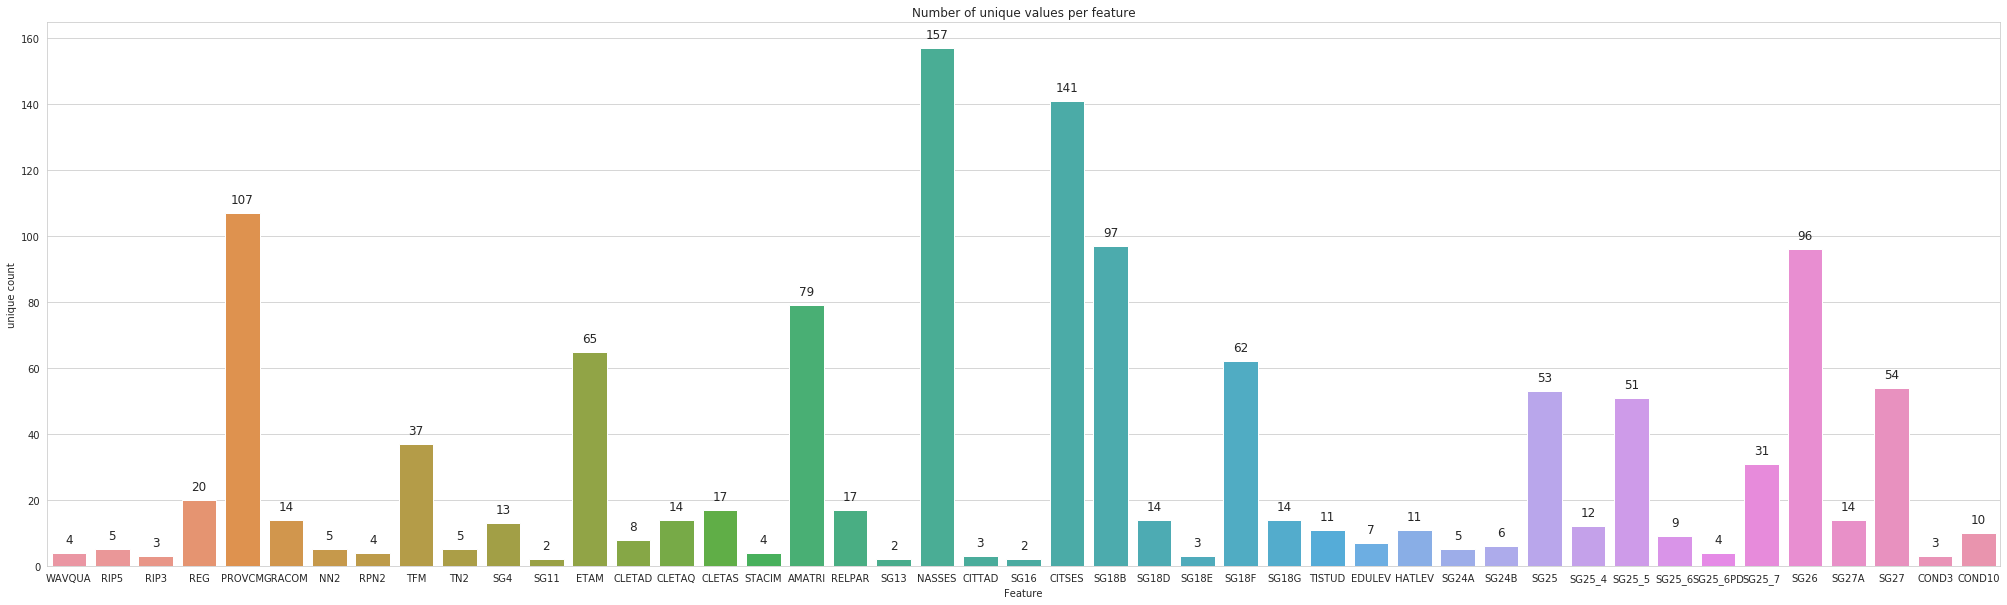

In [23]:
plt.figure(figsize=(35, 10))
data_features = list(data.columns[6:])
uniques = [len(data[col].unique()) for col in data_features]
ax = sns.barplot(data_features, uniques, log=False)
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            uniq,
            ha="center", fontsize=12)

###COND10 

The dataset also contains a variable with the conditional of the surveyed divided into ten sections. 

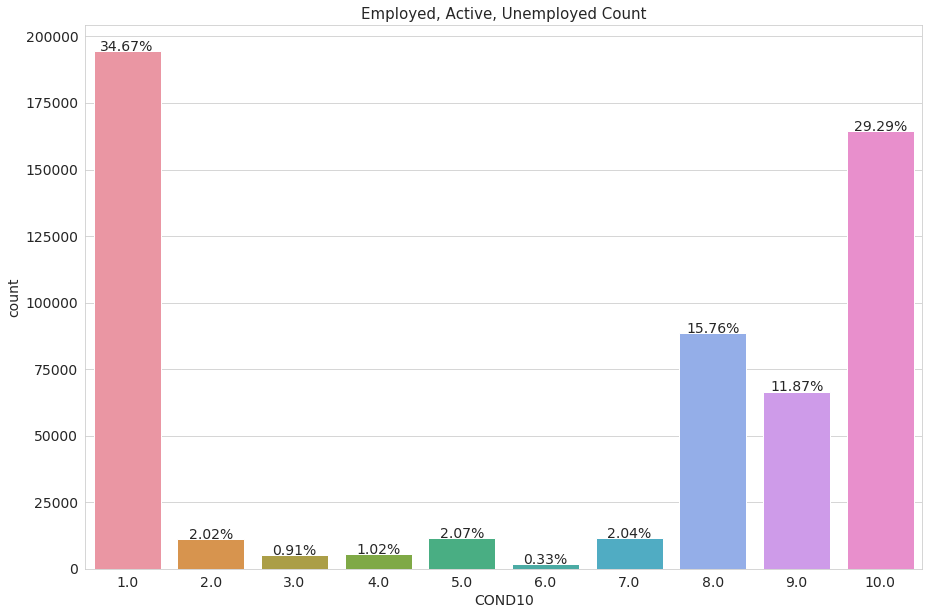

In [24]:
plt.rcParams.update({'font.size': 14})
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="COND10", data=data)
plt.title("Employed, Active, Unemployed Count",fontsize=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize = 14)
  
plt.show()

Ctaegories 9 and 10 represents surveyed people that are unemployed but are either too young or too old to work (-15 years old or +64 years old), we are not intereseted in predicting for these categories

In [0]:
df = df[df.COND10 != 9.0]
df = df[df.COND10 != 10.0]
data = df.copy()

In [26]:
df.shape

(330019, 51)

###The dependent variable: COND3

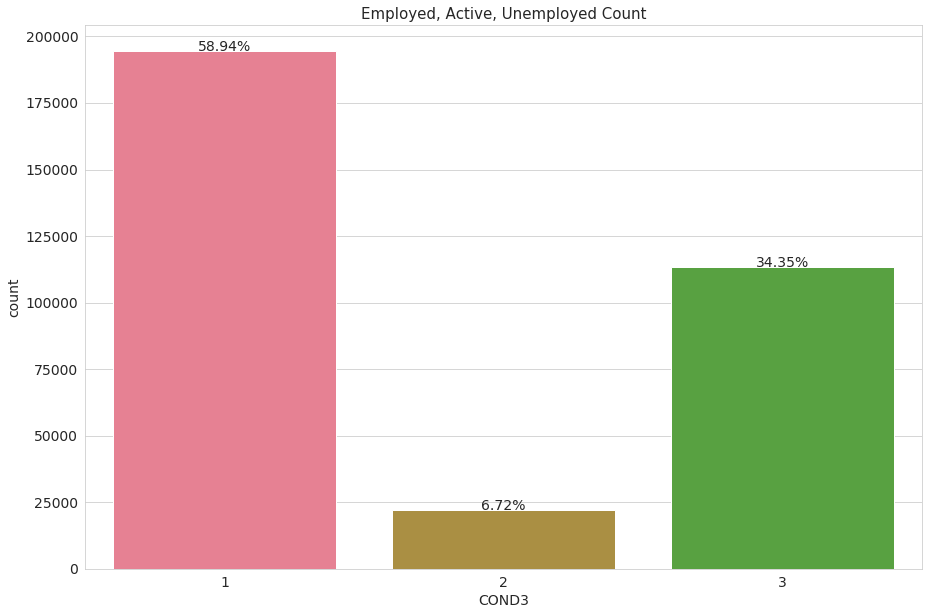

In [27]:
plt.rcParams.update({'font.size': 14})
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="COND3", data=data)
plt.title("Employed, Active, Unemployed Count",fontsize=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize = 14)
  
plt.show()

The label class 2 (actively looking for a job) is really unbalanced (only 3% of the observations), for convenience we will turn it into class label 3, unemployed. Again, e are interested in exploring and predicting for unemployment.

In [28]:
df['COND3'].unique()

array([1, 3, 2])

In [0]:
df.loc[df['COND3'] == int(2), 'COND3'] = int(3)
data = df.copy()

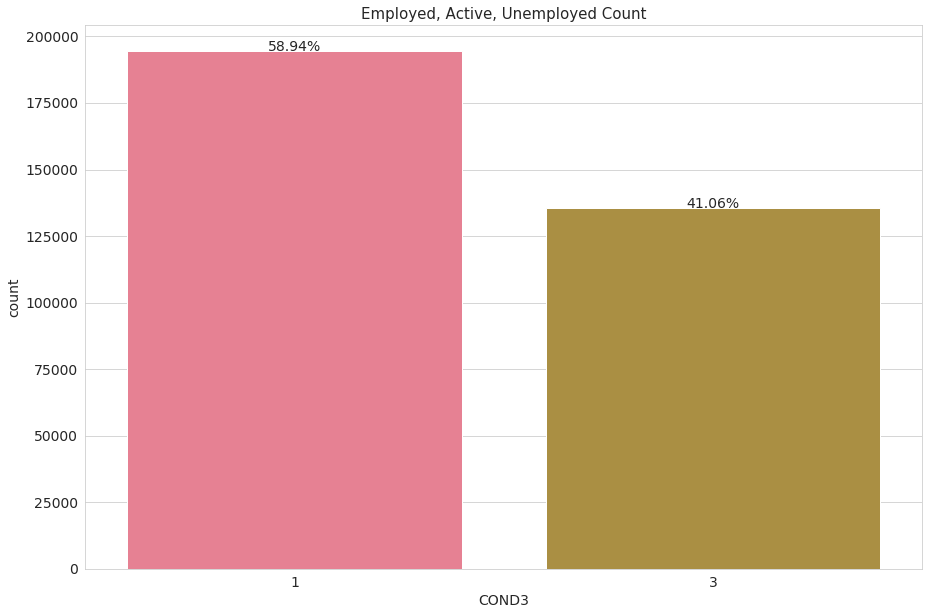

In [30]:
plt.rcParams.update({'font.size': 14})
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="COND3", data=data)
plt.title("Employed, Active, Unemployed Count",fontsize=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize = 14)
  
plt.show()

###Geographical info

3 way geographical division: RIP3 (North, Center, South)

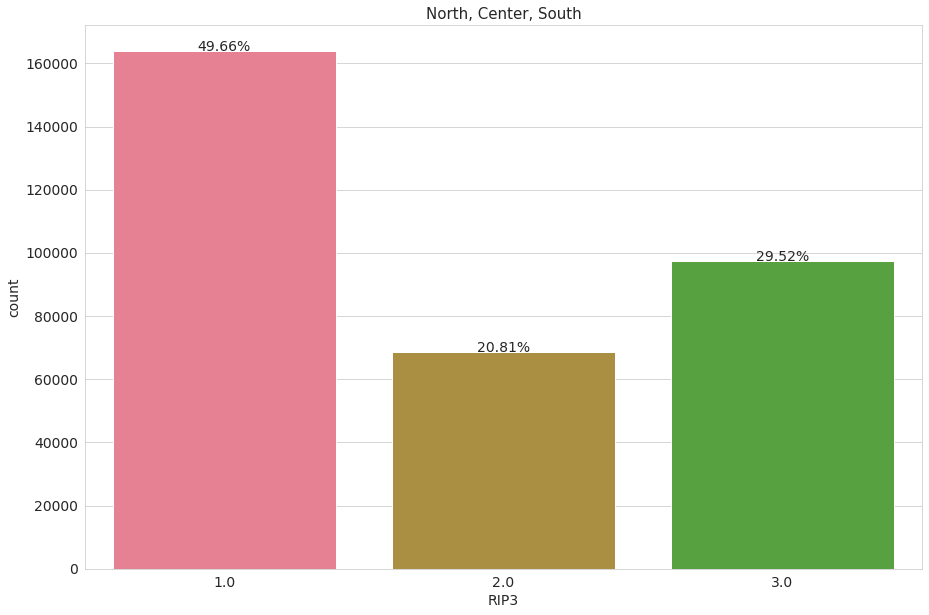

In [31]:
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="RIP3", data=data)
plt.title("North, Center, South",fontsize=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize = 14)
  
plt.show()

Let's now mix it up with employment features

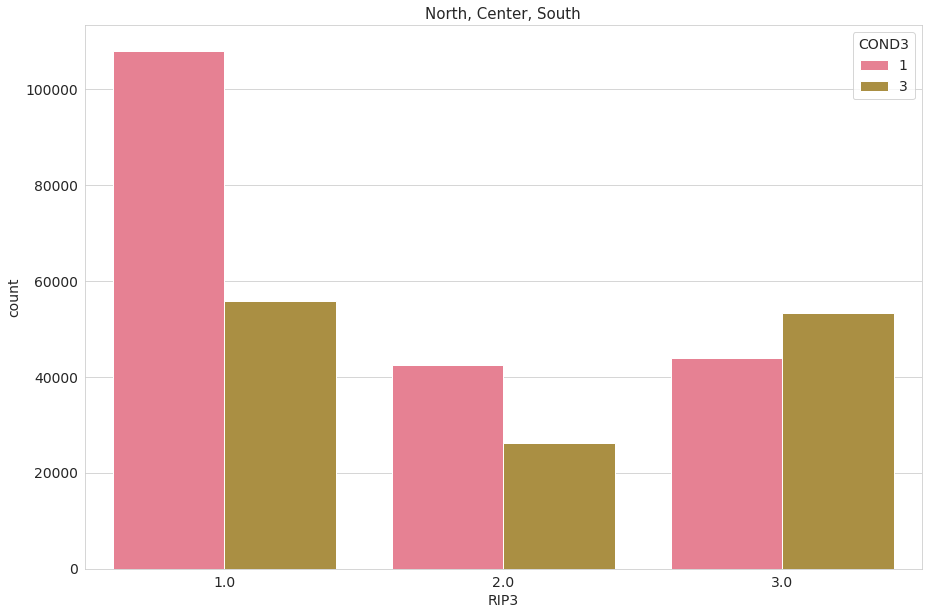

In [32]:
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="RIP3", data=data, hue="COND3")
plt.title("North, Center, South",fontsize=15)
  
plt.show()

5 way geographical division: RIP5 (North West, North East, Center, South, Islands)

In [0]:
sns.set_palette("cubehelix")

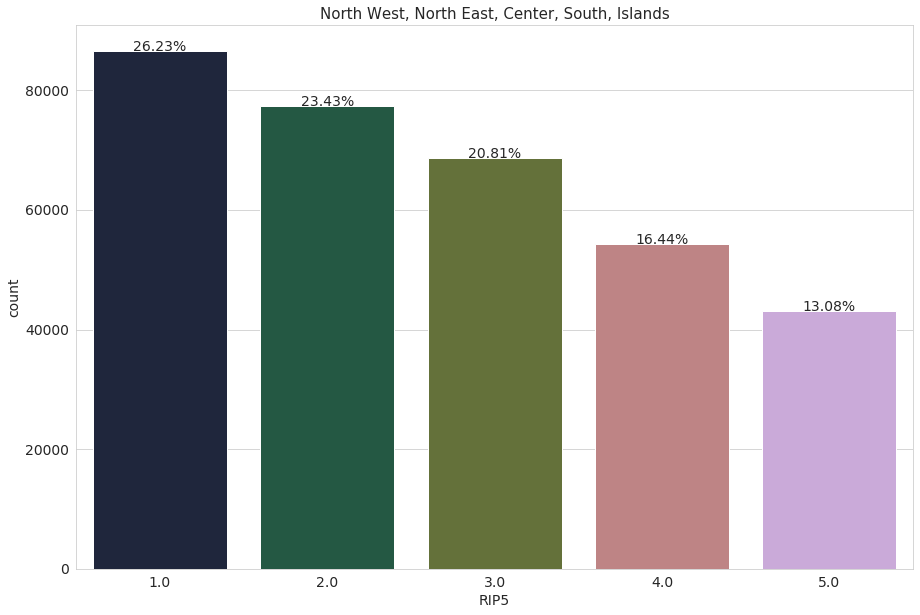

In [34]:
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="RIP5", data=data)
plt.title("North West, North East, Center, South, Islands",fontsize=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize = 14)
  
plt.show()

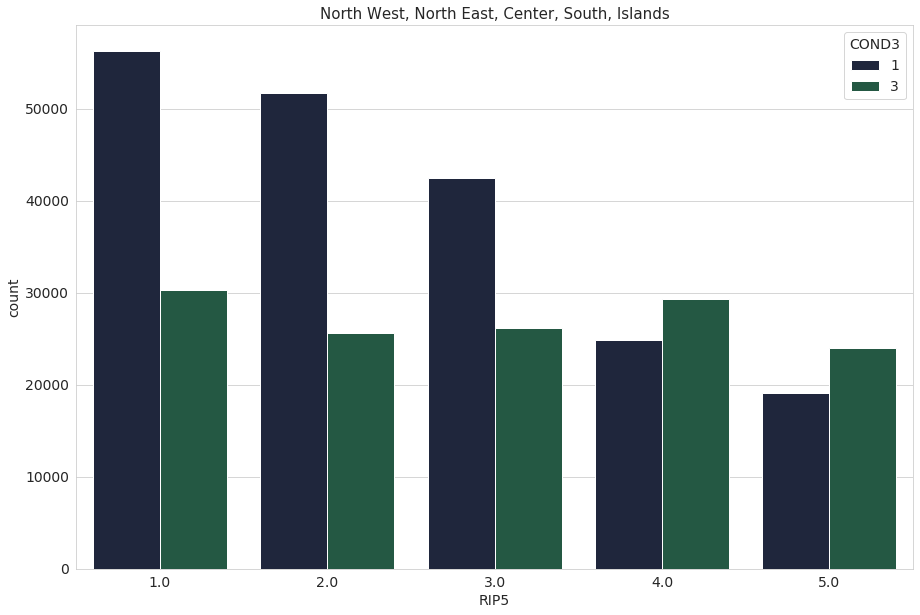

In [35]:
total = len(data)
plt.figure(figsize=(15,10))
ax = sns.countplot(x="RIP5", data=data, hue="COND3")
plt.title("North West, North East, Center, South, Islands",fontsize=15)
plt.show()

###Other features distribution

Let's now plot all the other interesting features

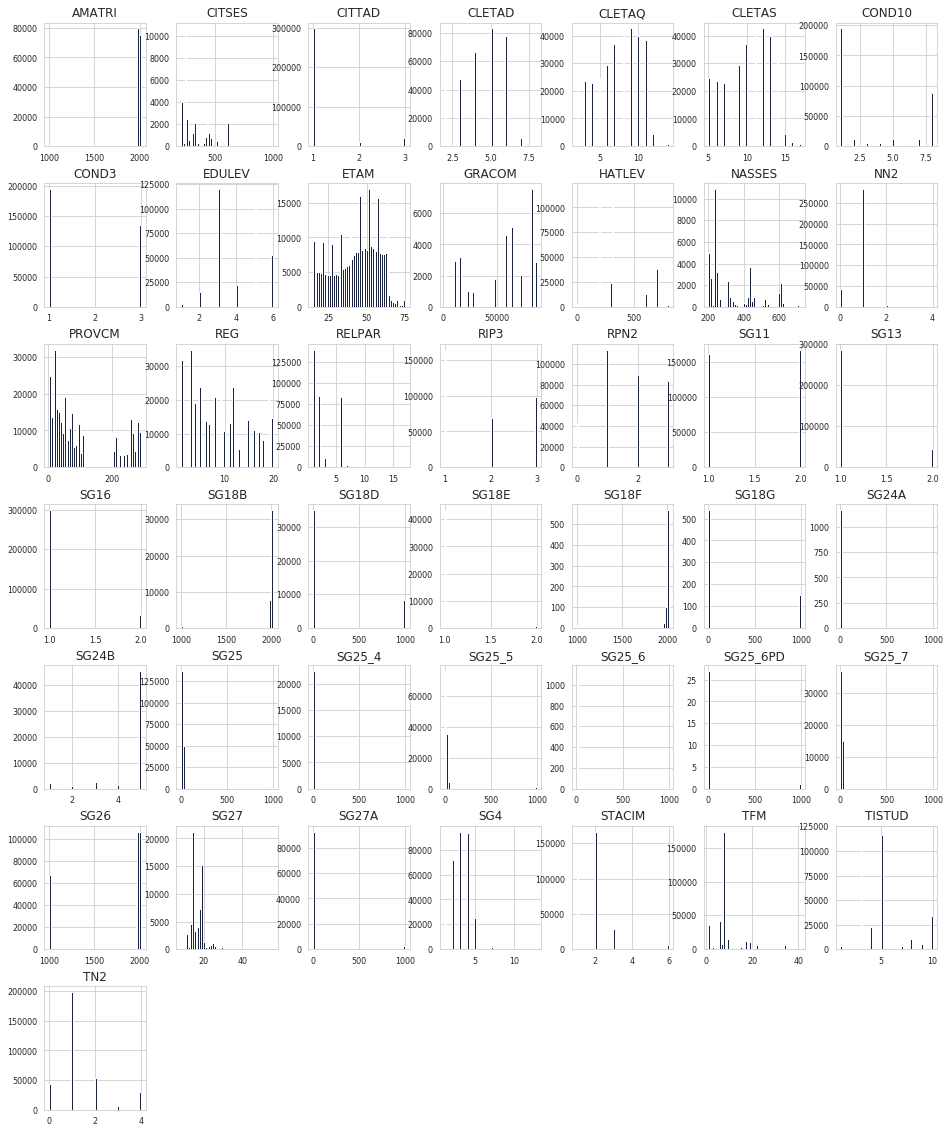

In [36]:
plt.rcParams.update({'font.size': 10})
df_filter = data[data.columns[8:]]
df_filter.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

##Feature Engineering

From fast.ai forum, this is the best practice for NA values "In general you can do this. For the case of a numeric variable you can add a new column X1_is_NA which is going to be 1 if the original X1 column was NA and 0 otherwise. Then you substitute the NA value in the original column with the mean/ median. For a categorical variable you can leave NA as a new category."

In [0]:
def create_NA_columns(df):
  features = df.isnull().any()
  features_na = features[features==True]
  features_na = list(features_na.index)
  for g in features_na:
    df[g + '_is_NA'] = df[g].apply(lambda x: 1 if np.isnan(x) else 0) #create a new column _is_NA
    #df[g].fillna((unemp_ra_demcomp_educat_df[g].mean()), inplace=True) #fill with Mean
  return df.head()

In [0]:
  features = df.isnull().any()
  features_na = features[features==True]

In [39]:
list(features_na.index)

['GRACOM',
 'AMATRI',
 'NASSES',
 'CITSES',
 'SG18B',
 'SG18D',
 'SG18E',
 'SG18F',
 'SG18G',
 'SG24A',
 'SG24B',
 'SG25',
 'SG25_4',
 'SG25_5',
 'SG25_6',
 'SG25_6PD',
 'SG25_7',
 'SG26',
 'SG27A',
 'SG27']

In [40]:
create_NA_columns(df)

,IDNO,TITL,VERSION,RELEASE,ANNO,TRIM,WAVQUA,RIP5,RIP3,REG,PROVCM,GRACOM,NN2,RPN2,TFM,TN2,SG4,SG11,ETAM,CLETAD,CLETAQ,CLETAS,STACIM,AMATRI,RELPAR,SG13,NASSES,CITTAD,SG16,CITSES,SG18B,SG18D,SG18E,SG18F,SG18G,TISTUD,EDULEV,HATLEV,SG24A,SG24B,SG25,SG25_4,SG25_5,SG25_6,SG25_6PD,SG25_7,SG26,SG27A,SG27,COND3,COND10,GRACOM_is_NA,AMATRI_is_NA,NASSES_is_NA,CITSES_is_NA,SG18B_is_NA,SG18D_is_NA,SG18E_is_NA,SG18F_is_NA,SG18G_is_NA,SG24A_is_NA,SG24B_is_NA,SG25_is_NA,SG25_4_is_NA,SG25_5_is_NA,SG25_6_is_NA,SG25_6PD_is_NA,SG25_7_is_NA,SG26_is_NA,SG27A_is_NA,SG27_is_NA
0,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,1.0,8.0,1.0,3.0,2.0,37.0,4.0,6.0,9.0,2.0,2015.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,800.0,NaN,4.0,19.0,NaN,NaN,NaN,NaN,19.0,2010.0,NaN,NaN,1,1.0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1
1,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,2.0,8.0,1.0,3.0,1.0,36.0,4.0,6.0,9.0,2.0,2015.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,NaN,5.0,19.0,NaN,NaN,NaN,NaN,19.0,2010.0,NaN,NaN,1,1.0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1
4,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,2.0,1.0,1.0,7.0,210.0,10025.0,0.0,0.0,1.0,0.0,1.0,1.0,60.0,6.0,11.0,14.0,3.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,1976.0,NaN,NaN,3,8.0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1
5,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,4.0,3.0,16.0,272.0,72006.0,1.0,2.0,8.0,1.0,4.0,1.0,51.0,5.0,9.0,12.0,2.0,1992.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,NaN,5.0,9.0,NaN,NaN,NaN,NaN,9.0,997.0,NaN,24.0,1,1.0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0
6,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,4.0,3.0,16.0,272.0,72006.0,1.0,1.0,8.0,1.0,4.0,2.0,48.0,5.0,8.0,11.0,2.0,1992.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,997.0,NaN,18.0,3,8.0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0


In [41]:
for column in df.columns:
  try:
    print(column, variable_dict[column])
  except KeyError:
    print(f"{column}'variable is not listed.")

IDNO'variable is not listed.
TITL'variable is not listed.
VERSION'variable is not listed.
RELEASE'variable is not listed.
ANNO anno
TRIM trimestre
WAVQUA Wave quartina in corso
RIP5 ripartizione geografica in 5 classi
RIP3 ripartizione geografica in 3 classi
REG regione
PROVCM Provincia/Città Metropolitana
GRACOM codice grandi comuni
NN2'variable is not listed.
RPN2'variable is not listed.
TFM tipologia familiare (con ricodifiche per MFR)
TN2'variable is not listed.
SG4 Le chiederò prima alcune informazioni sulla sua famiglia. Quante persone vivono abitualmente in questa casa  compreso lei? Escluda eventuali collaboratori domestici o affittuari. 
SG11 Indicare il sesso di NOME
ETAM età in anni compiuti (con ricodifiche per MFR)
CLETAD classi di età decennali
CLETAQ classi di età quinquennali
CLETAS età in 17 classi
STACIM stato civile (con ricodifiche per MFR)
AMATRI'variable is not listed.
RELPAR'variable is not listed.
SG13 NOME è nato in Italia o all'estero?
NASSES stato estero di n

###Geospatial-Regions

In [42]:
regions_df = pd.read_csv(os.path.join(data_path, 'Ita_spatialdata', 'codici_regioni.csv'), sep= ';')
regions_df.rename({'ID': 'REG'}, axis=1, inplace=True)
regions_df.head()

,REG,REGIONE
0,1,Piemonte
1,2,Valle d'Aosta
2,3,Lombardia
3,4,Trentino alto Adige
4,5,Veneto


In [43]:
tuples_l = []
for index, row in regions_df.iterrows():
  reg_tuple = (regions_df.iloc[index, 0], regions_df.iloc[index,1])
  tuples_l.append(reg_tuple)

tuples_l

[(1, 'Piemonte'),
 (2, "Valle d'Aosta"),
 (3, 'Lombardia'),
 (4, 'Trentino alto Adige'),
 (5, 'Veneto'),
 (6, 'Friuli Venezia Giulia'),
 (7, 'Liguria'),
 (8, 'Emilia Romagna'),
 (9, 'Toscana'),
 (10, 'Umbria'),
 (11, 'Marche'),
 (12, 'Lazio'),
 (13, 'Abruzzo'),
 (14, 'Molise'),
 (15, 'Campania'),
 (16, 'Puglia'),
 (17, 'Basilicata'),
 (18, 'Calabria'),
 (19, 'Sicilia'),
 (20, 'Sardegna')]

In [44]:
df = df.merge(regions_df, how='left', on= 'REG')
df.rename({'REGIONE': 'REG_NAME'}, axis=1, inplace=True)
df.head()

,IDNO,TITL,VERSION,RELEASE,ANNO,TRIM,WAVQUA,RIP5,RIP3,REG,PROVCM,GRACOM,NN2,RPN2,TFM,TN2,SG4,SG11,ETAM,CLETAD,CLETAQ,CLETAS,STACIM,AMATRI,RELPAR,SG13,NASSES,CITTAD,SG16,CITSES,SG18B,SG18D,SG18E,SG18F,SG18G,TISTUD,EDULEV,HATLEV,SG24A,SG24B,SG25,SG25_4,SG25_5,SG25_6,SG25_6PD,SG25_7,SG26,SG27A,SG27,COND3,COND10,GRACOM_is_NA,AMATRI_is_NA,NASSES_is_NA,CITSES_is_NA,SG18B_is_NA,SG18D_is_NA,SG18E_is_NA,SG18F_is_NA,SG18G_is_NA,SG24A_is_NA,SG24B_is_NA,SG25_is_NA,SG25_4_is_NA,SG25_5_is_NA,SG25_6_is_NA,SG25_6PD_is_NA,SG25_7_is_NA,SG26_is_NA,SG27A_is_NA,SG27_is_NA,REG_NAME
0,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,1.0,8.0,1.0,3.0,2.0,37.0,4.0,6.0,9.0,2.0,2015.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,800.0,NaN,4.0,19.0,NaN,NaN,NaN,NaN,19.0,2010.0,NaN,NaN,1,1.0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,Marche
1,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,2.0,8.0,1.0,3.0,1.0,36.0,4.0,6.0,9.0,2.0,2015.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,NaN,5.0,19.0,NaN,NaN,NaN,NaN,19.0,2010.0,NaN,NaN,1,1.0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,Marche
2,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,2.0,1.0,1.0,7.0,210.0,10025.0,0.0,0.0,1.0,0.0,1.0,1.0,60.0,6.0,11.0,14.0,3.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,1976.0,NaN,NaN,3,8.0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,Liguria
3,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,4.0,3.0,16.0,272.0,72006.0,1.0,2.0,8.0,1.0,4.0,1.0,51.0,5.0,9.0,12.0,2.0,1992.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,NaN,5.0,9.0,NaN,NaN,NaN,NaN,9.0,997.0,NaN,24.0,1,1.0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,Puglia
4,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,4.0,3.0,16.0,272.0,72006.0,1.0,1.0,8.0,1.0,4.0,2.0,48.0,5.0,8.0,11.0,2.0,1992.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,997.0,NaN,18.0,3,8.0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,Puglia


In [45]:
df.shape

(330019, 72)

In [46]:
#let's match names 
df_l = list(df['REG_NAME'].unique())
df_l = np.sort(df_l)
df_l

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Trentino alto Adige',
       'Umbria', "Valle d'Aosta", 'Veneto'], dtype='<U21')

In [47]:
#merge with 2019 population data 
pop_df = pd.read_csv(os.path.join(data_path, 'Ita_spatialdata', 'ita_pop.csv'))
pop_df.head()

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2019,2019,225428,NaN,NaN
1,IT,Italia,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2019,2019,225428,NaN,NaN
2,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2019,2019,212859,NaN,NaN
3,IT,Italia,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2019,2019,212859,NaN,NaN
4,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,1,nubile/celibe,2019,2019,438287,NaN,NaN


In [48]:
pop_dft = pop_df.loc[(pop_df['Sesso'] == 'totale') & (pop_df['Stato civile'] == 'totale') & (pop_df['ETA1'] == 'TOTAL')]
pop_dff = pop_df.loc[(pop_df['Sesso'] == 'femmine') & (pop_df['Stato civile'] == 'totale') & (pop_df['ETA1'] == 'TOTAL')]
pop_dfm = pop_df.loc[(pop_df['Sesso'] == 'maschi') & (pop_df['Stato civile'] == 'totale') & (pop_df['ETA1'] == 'TOTAL')]
pop_dft.rename({'Value': 'Value_T'}, axis=1, inplace=True)
pop_dff.rename({'Value': 'Value_F'}, axis=1, inplace=True)
pop_dfm.rename({'Value': 'Value_M'}, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [49]:
pop_df_l = list(pop_dft['Territorio'].unique())
for region in df_l:
  if region in pop_df_l:
    print(region, 'Present')
  if region not in pop_df_l:
    print(region, 'Not Present')

Abruzzo Present
Basilicata Present
Calabria Present
Campania Present
Emilia Romagna Not Present
Friuli Venezia Giulia Not Present
Lazio Present
Liguria Present
Lombardia Present
Marche Present
Molise Present
Piemonte Present
Puglia Present
Sardegna Present
Sicilia Present
Toscana Present
Trentino alto Adige Not Present
Umbria Present
Valle d'Aosta Not Present
Veneto Present


In [50]:
pop_dft.loc[pop_df['Territorio'] == "Emilia-Romagna", 'Territorio'] = 'Emilia Romagna'
pop_dft.loc[pop_df['Territorio'] == "Friuli-Venezia Giulia", 'Territorio'] = 'Friuli Venezia Giulia'
pop_dft.loc[pop_df['Territorio'] == "Trentino Alto Adige / Südtirol", 'Territorio'] = 'Trentino alto Adige'
pop_dft.loc[pop_df['Territorio'] == "Valle d'Aosta / Vallée d'Aoste", 'Territorio'] = "Valle d'Aosta"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
pop_dft = pop_dft.merge(pop_dff[['Territorio', 'Value_F']], how='left', on= 'Territorio')
pop_dft = pop_dft.merge(pop_dfm[['Territorio', 'Value_M']], how='left', on= 'Territorio')
pop_dft.rename({'Territorio': 'REG_NAME'}, axis=1, inplace=True)

In [52]:
pop_dft.tail()

,ITTER107,REG_NAME,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value_T,Flag Codes,Flags,Value_F,Value_M
130,ITG14,Agrigento,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,434870,NaN,NaN,223160.0,211710.0
131,ITG19,Siracusa,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,399224,NaN,NaN,202353.0,196871.0
132,ITG28,Oristano,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,157707,NaN,NaN,79976.0,77731.0
133,IT108,Monza e della Brianza,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,873935,NaN,NaN,445670.0,428265.0
134,IT111,Sud Sardegna,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2019,2019,350725,NaN,NaN,176663.0,174062.0


In [53]:
pop_df_l = list(pop_dft['REG_NAME'].unique())
for region in df_l:
  if region in pop_df_l:
    print(region, 'Present')
  if region not in pop_df_l:
    print(region, 'Not Present')

Abruzzo Present
Basilicata Present
Calabria Present
Campania Present
Emilia Romagna Present
Friuli Venezia Giulia Present
Lazio Present
Liguria Present
Lombardia Present
Marche Present
Molise Present
Piemonte Present
Puglia Present
Sardegna Present
Sicilia Present
Toscana Present
Trentino alto Adige Present
Umbria Present
Valle d'Aosta Present
Veneto Present


In [0]:
df = df.merge(pop_dft[['REG_NAME', 'Value_M', 'Value_F', 'Value_T']], how='left', on= 'REG_NAME')

In [55]:
df.head()

,IDNO,TITL,VERSION,RELEASE,ANNO,TRIM,WAVQUA,RIP5,RIP3,REG,PROVCM,GRACOM,NN2,RPN2,TFM,TN2,SG4,SG11,ETAM,CLETAD,CLETAQ,CLETAS,STACIM,AMATRI,RELPAR,SG13,NASSES,CITTAD,SG16,CITSES,SG18B,SG18D,SG18E,SG18F,SG18G,TISTUD,EDULEV,HATLEV,SG24A,SG24B,SG25,SG25_4,SG25_5,SG25_6,SG25_6PD,SG25_7,SG26,SG27A,SG27,COND3,COND10,GRACOM_is_NA,AMATRI_is_NA,NASSES_is_NA,CITSES_is_NA,SG18B_is_NA,SG18D_is_NA,SG18E_is_NA,SG18F_is_NA,SG18G_is_NA,SG24A_is_NA,SG24B_is_NA,SG25_is_NA,SG25_4_is_NA,SG25_5_is_NA,SG25_6_is_NA,SG25_6PD_is_NA,SG25_7_is_NA,SG26_is_NA,SG27A_is_NA,SG27_is_NA,REG_NAME,Value_M,Value_F,Value_T
0,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,1.0,8.0,1.0,3.0,2.0,37.0,4.0,6.0,9.0,2.0,2015.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,800.0,NaN,4.0,19.0,NaN,NaN,NaN,NaN,19.0,2010.0,NaN,NaN,1,1.0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,Marche,740927.0,784344.0,1525271
1,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,3.0,2.0,11.0,42.0,NaN,1.0,2.0,8.0,1.0,3.0,1.0,36.0,4.0,6.0,9.0,2.0,2015.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,NaN,5.0,19.0,NaN,NaN,NaN,NaN,19.0,2010.0,NaN,NaN,1,1.0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,Marche,740927.0,784344.0,1525271
2,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,2.0,1.0,1.0,7.0,210.0,10025.0,0.0,0.0,1.0,0.0,1.0,1.0,60.0,6.0,11.0,14.0,3.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,1976.0,NaN,NaN,3,8.0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,Liguria,741760.0,808880.0,1550640
3,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,4.0,3.0,16.0,272.0,72006.0,1.0,2.0,8.0,1.0,4.0,1.0,51.0,5.0,9.0,12.0,2.0,1992.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.0,700.0,NaN,5.0,9.0,NaN,NaN,NaN,NaN,9.0,997.0,NaN,24.0,1,1.0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,Puglia,1959903.0,2069150.0,4029053
4,SN202,Rilevazione Continua sulle Forze di Lavoro - O...,1.0 - 07/05/2019,17/04/2019,2018.0,4.0,1.0,4.0,3.0,16.0,272.0,72006.0,1.0,1.0,8.0,1.0,4.0,2.0,48.0,5.0,8.0,11.0,2.0,1992.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,304.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,NaN,997.0,NaN,18.0,3,8.0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,Puglia,1959903.0,2069150.0,4029053


In [0]:
df.rename({'Value_M': 'Population_M', 'Value_F': 'Population_F', 'Value_T': 'Population_T' }, axis=1, inplace=True)

In [57]:
df.shape

(336895, 75)

In [0]:
#save the feture engineered df
df.to_csv(os.path.join(data_path,'Survey_f.csv'))

In [0]:
#rewrite all code to only include (train_df[cat_vars[4:]+cont_vars], train_df[dep_var], test_size=0.33)